To sumarize the results .. usually, we use either single point estimate (i.e. mean, median ...) or interval (i.e. confidance interval..) ..


In [8]:
import dice
import train
import train3
import matplotlib.pyplot as plt
%matplotlib inline

In [1]:
def Percentile(pmf, percentage):
    p = percentage / 100.0
    total = 0
    for val, prob in pmf.Items():
        total += prob
        if total >= p:
            return val

In [14]:
hypos = xrange(1, 1001)
data = [4, 6, 8, 12, 20]

In [15]:
class Train(dice.Suite):
    def Likelihood(self, data, hypo):
        if hypo < data:
            return 0
        else:
            return 1.0/hypo

In [16]:
suite = Train(hypos)
suite

In [19]:
train3.Percentile(suite, 5), train3.Percentile(suite, 95)

(50, 950)

In [20]:
cdf = suite.MakeCdf()

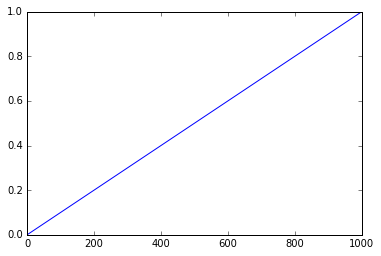

In [22]:
plt.plot(cdf.xs, cdf.ps)

In [25]:
cdf.Percentile(5), cdf.Percentile(95)

(50, 950)

How come 950 not 95 !! .. This has to be the 95th percentile ! :S

## Note:

Converting from a Pmf to a Cdf takes time proportional to the number of
values, len(pmf). The Cdf stores the values and probabilities in sorted lists,
so looking up a probability to get the corresponding value takes “log time”:
that is, time proportional to the logarithm of the number of values. Looking
up a value to get the corresponding probability is also logarithmic, so Cdfs
are efficient for many calculations.